<a href="https://colab.research.google.com/github/ThatBenZhang/MNIST-classifier-from-scratch/blob/main/MNIST_classifier_using_numpy_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

In [10]:
import os
path = os.listdir("../content/sample_data")
print(path)

['README.md', 'anscombe.json', 'mnist_train_small.csv', 'california_housing_train.csv', 'california_housing_test.csv', 'mnist_test.csv']


In [15]:
train = pd.read_csv('../content/sample_data/mnist_train_small.csv')
test = pd.read_csv('../content/sample_data/mnist_test.csv')

In [42]:
# train[:, 1]
# df.dtypes
# train.shape

In [45]:
# no 'label' column, instead using the 0x0 entry of the matrix as substitute, which is '6'
ytr = train['6'].values
xtr = train.drop(columns = ['6']).values / 255
xtest = test.values / 255

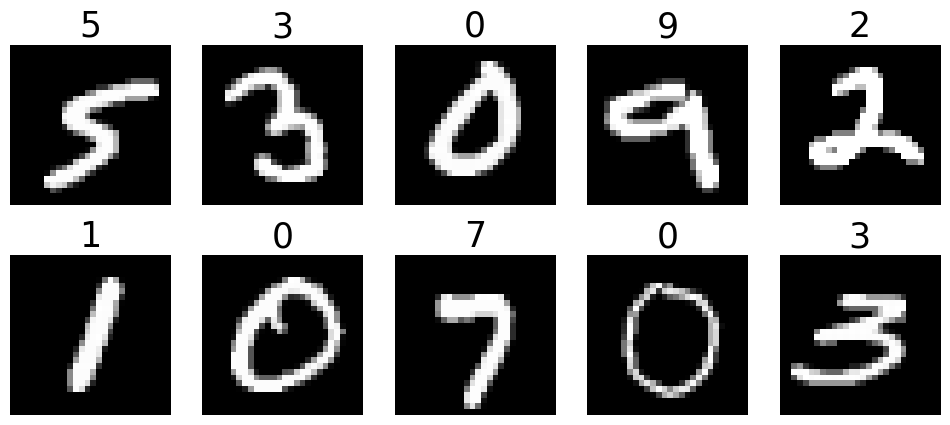

In [52]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,19999,size=10)
for i in range(10):
    axes[i].imshow(xtr[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(ytr[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [53]:
def ReLU(Z):
    return np.maximum(Z, 0)

def Sig(Z):
    return 1 / (1 + np.exp(-Z))

def softmax(Z):
    exp_Z = np.exp(Z)
    sum_exp_Z = np.sum(exp_Z, axis=1, keepdims=True)
    A = exp_Z / sum_exp_Z
    return A

In [61]:
print(xtr.shape, ytr.shape)

(19999, 784) (19999,)


In [68]:
# np.random.seed(1127825)
# K = 10
# n = xtr.shape[1]
# n_H = 256
# W = [0.1*np.random.randn(n, n_H), 0.1*np.random.randn(n_H, K)]
# b = [np.random.randn(n_H)]
# atest = xtr
# z1test = z1 = np.matmul(xtr, W[0])
# a2test = ReLU(z1test)
# z2test = np.matmul(z1test, W[1])
# softmax(z2test)
# one_hot_y_true = (ytr[:, np.newaxis] == np.arange(K))
# one_hot_y_true.shape

(19999, 10)

In [70]:
def forward_prop(X, W, b):
  a1 = X # input layer (1) N x 784
  z1 = np.matmul(a1, W[0]) + b[0] # input layer (1) -> hidden layer (2), N x 256
  a2 = ReLU(z1) # hidden layer (2) activation N x 256
  z2 = np.matmul(a2, W[1]) # hidden layer (2) -> output layer (3) N x K
  # s = np.exp(z2)
  # total = np.sum(s, axis=1).reshape(-1,1)
  # sigma = s/total
  A = softmax(z2)
  return A, a1, a2, z1, z2 # A.shape = N x K
  # return sigma # the output is a probability for each sample


In [69]:
def loss(y_pred, x_pred):
  global K
  K = 10
  # N = len(y_true)
  one_hot_y_true = (ytr[:, np.newaxis] == np.arange(K)) # N x K matrix, boolean
  loss_sample = (np.log(y_pred) * one_hot_y_true).sum(axis=1) # element-wise
  return -np.mean(loss_sample)

In [ ]:
def ReLU_deriv(Z):
    return Z > 0

def Sig_deriv(Z):
    return Sig(Z) * (1 - Sig(Z))

# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

In [72]:
def back_prop(X, Y, W, b, alpha):
  K = 10
  N = X.shape[0] # N = 784

  one_hot_y_true = (ytr[:, np.newaxis] == np.arange(K)) # N x K
  d2 = (softmax(z2) - one_hot_y_true) # N x K
  dW1 = np.matmul(a2.T, d2) # output layer derivative to layer 2, n x K

  d1 = np.matmul(d2, W[1].T) * ReLU_deriv(z1)
  dW0 = np.matmul(a1.T, d1)

  dW = [dW0 / N + alpha * W[0], dW1 / N + alpha * W[1]]
  db = [np.mean(d1, axis = 0)]
  return dW, db

In [73]:
def get_predictions(A):
    return np.argmax(A, 0)

def get_accuracy(predictions, Y):
    print(predictions, Ytr)
    return np.sum(predictions == Ytr) / Ytr.size

In [75]:
K = 10
n = xtr.shape[1]
n_H = 256
W = [0.1*np.random.randn(n, n_H), 0.1*np.random.randn(n_H, K)]
b = [np.random.randn(n_H)]
def gradient_descent(X, Y, alpha, iterations):
    for i in range(iterations):
        a1, a2, z1, z2, A = forward_prop(X, W, b)
        dW, db = back_prop(X, Y, W, b, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A)
            print(get_accuracy(predictions, Y))
    return W, b

W, b = gradient_descent(xtr, ytr, 0.1, 500)

ValueError: too many values to unpack (expected 5)